# Content of the Notebook

    0. Importing libraries and data
    1. Preparing data
    2. The Elbow Technique
    3. K-means clustering
    4. Plotting the clusters
    5. Descriptive statistics
    6. How can the results be useful & Future analysis
   

# 0. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### For this analysis, the subset of the data containing only Full-Time employees based in the USA will be used to allow for a more accurate and consistent comparison.

In [3]:
#Import Data
df = pd.read_csv('/Users/buketoztekin/Documents/usa_ft_subset.csv')

# 1. Preparing data

### The categorical columns 'experience_level' and 'company_size' are one-hot encoded to facilitate the K-Means clustering analysis.

In [4]:
# Perform one-hot encoding on both 'experience_level' and 'company_size'
df_encoded = pd.get_dummies(df, columns=['experience_level', 'company_size'], drop_first=False)

# Convert any boolean values to 0/1 for consistency
encoded_cols = [col for col in df_encoded.columns if 'experience_level' in col or 'company_size' in col]
df_encoded[encoded_cols] = df_encoded[encoded_cols].astype(int)

# Check the result to ensure both columns are encoded
print(df_encoded.head())


   work_year employment_type          job_title  salary_in_usd  \
0       2024              FT       AI Developer         252000   
1       2024              FT       AI Developer         168000   
2       2024              FT     Data Scientist         199500   
3       2024              FT     Data Scientist          86700   
4       2024              FT  Research Engineer         180000   

  employee_residence  remote_ratio company_location  experience_level_encoded  \
0                 US             0               US                         2   
1                 US             0               US                         2   
2                 US           100               US                         1   
3                 US           100               US                         1   
4                 US             0               US                         2   

   experience_level_EN  experience_level_EX  experience_level_MI  \
0                    0                    0     

### A new dataframe containing only numerical variables was created to perform the K-Means clustering analysis.

In [5]:
# Select the salary column and the other specific columns
columns_to_keep = ['salary_in_usd', 'remote_ratio', 'work_year'] + \
                  [col for col in df_encoded.columns if 'experience_level' in col or 'company_size' in col]

# Create the new dataframe
df_cluster = df_encoded[columns_to_keep]

# Check the first few rows of the new dataframe
print(df_cluster.head())

   salary_in_usd  remote_ratio  work_year  experience_level_encoded  \
0         252000             0       2024                         2   
1         168000             0       2024                         2   
2         199500           100       2024                         1   
3          86700           100       2024                         1   
4         180000             0       2024                         2   

   experience_level_EN  experience_level_EX  experience_level_MI  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    0                    0   

   experience_level_SE  company_size_L  company_size_M  company_size_S  
0                    1               0               1               0  
1                 

# 2. Elbow Technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-38610193742599.26,
 -14375835043723.807,
 -7680074041414.104,
 -4808521984182.981,
 -3254548563412.5635,
 -2405048114099.8853,
 -1775061345867.9487,
 -1361410811141.8572,
 -1114930808260.2427]

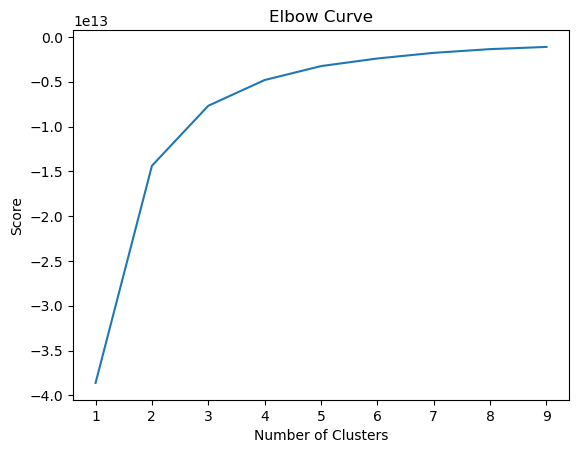

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow curve shows that the number of the clusters are 3. 

# 4. K-means Clustering

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [10]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_56941/2810219287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [12]:
df_cluster.head()

,salary_in_usd,remote_ratio,work_year,experience_level_encoded,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,clusters
0,252000,0,2024,2,0,0,0,1,0,1,0,2
1,168000,0,2024,2,0,0,0,1,0,1,0,0
2,199500,100,2024,1,0,0,1,0,0,1,0,0
3,86700,100,2024,1,0,0,1,0,0,1,0,1
4,180000,0,2024,2,0,0,0,1,0,0,1,0


In [13]:
df_cluster['clusters'].value_counts()

clusters
1    3744
0    3736
2    1332
Name: count, dtype: int64

# 5. Plotting the Clusters

### To plot the clusters, the one-hot encoded columns will be recombined to recreate the original categorical variables.

In [14]:
# Check the unique values in the one-hot encoded experience level columns
experience_level_cols = [col for col in df_encoded.columns if 'experience_level' in col]

# Display unique values in these columns to identify any non-numeric entries
for col in experience_level_cols:
    print(f"Unique values in {col}: {df_encoded[col].unique()}")


Unique values in experience_level_encoded: [2 1 3 0]
Unique values in experience_level_EN: [0 1]
Unique values in experience_level_EX: [0 1]
Unique values in experience_level_MI: [0 1]
Unique values in experience_level_SE: [1 0]


In [15]:
# Drop the 'experience_level_combined' column since it contains incorrect values
df_encoded.drop(columns=['experience_level_combined'], inplace=True, errors='ignore')

In [16]:
# Combine the one-hot encoded experience level columns into a single categorical column
experience_level_cols = ['experience_level_EN', 'experience_level_MI', 'experience_level_SE', 'experience_level_EX']

# Find the experience level based on which one-hot encoded column has the value 1
df_encoded['experience_level'] = df_encoded[experience_level_cols].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Check the result to ensure the combined column is correct
print(df_encoded['experience_level'].value_counts())

experience_level
SE    5369
MI    2293
EN     797
EX     353
Name: count, dtype: int64


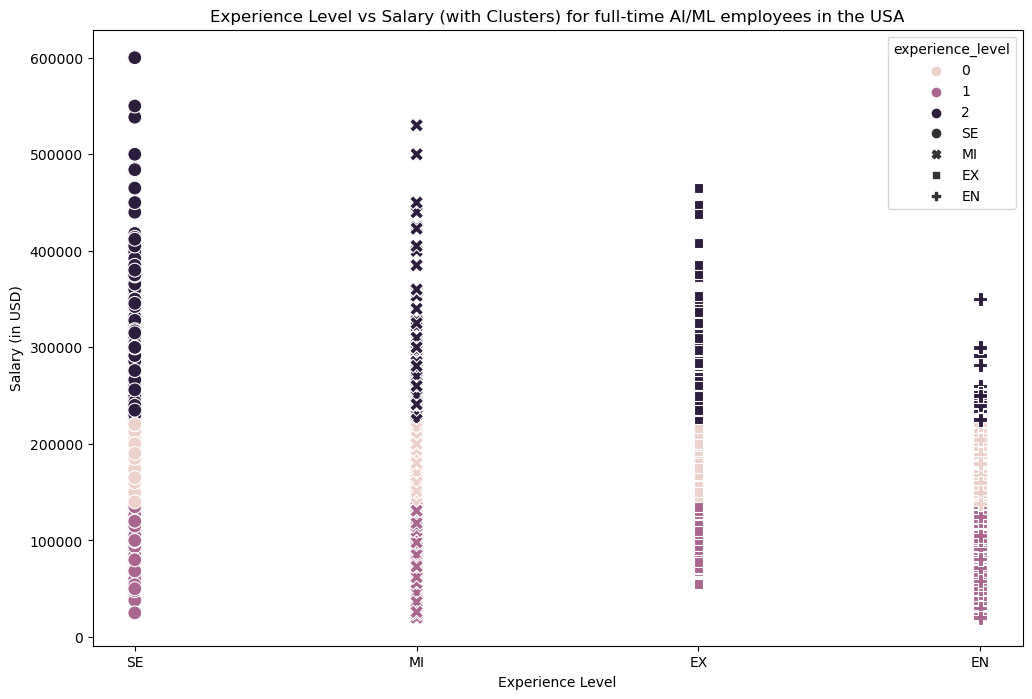

In [17]:
plt.figure(figsize=(12,8))

# Plot salary vs experience level with different symbols for each experience level
ax = sns.scatterplot(x='experience_level', 
                     y='salary_in_usd', 
                     hue=kmeans.labels_,  # Colors representing clusters
                     style='experience_level',  # Different markers for experience levels
                     s=100,  # Marker size
                     data=df_encoded)

# Customize the plot
ax.grid(False)
plt.xlabel('Experience Level') 
plt.ylabel('Salary (in USD)')
plt.title('Experience Level vs Salary (with Clusters) for full-time AI/ML employees in the USA')
plt.show()

### Entry-level jobs are predominantly associated with lower salaries, with only a few earning higher wages. Senior-level roles, on the other hand, show a wider salary distribution, with more employees earning higher salaries. Executive-level positions have very few instances of low salaries. However, due to the large number of senior-level employees, direct comparisons across experience levels can be challenging.

In [18]:
# Combine the one-hot encoded company size columns into a single categorical column
company_size_cols = ['company_size_S', 'company_size_M', 'company_size_L']

# Find the company size based on which one-hot encoded column has the value 1
df_encoded['company_size'] = df_encoded[company_size_cols].idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Check the result to ensure the combined column is correct
print(df_encoded['company_size'].value_counts())


company_size
M    8374
L     380
S      58
Name: count, dtype: int64


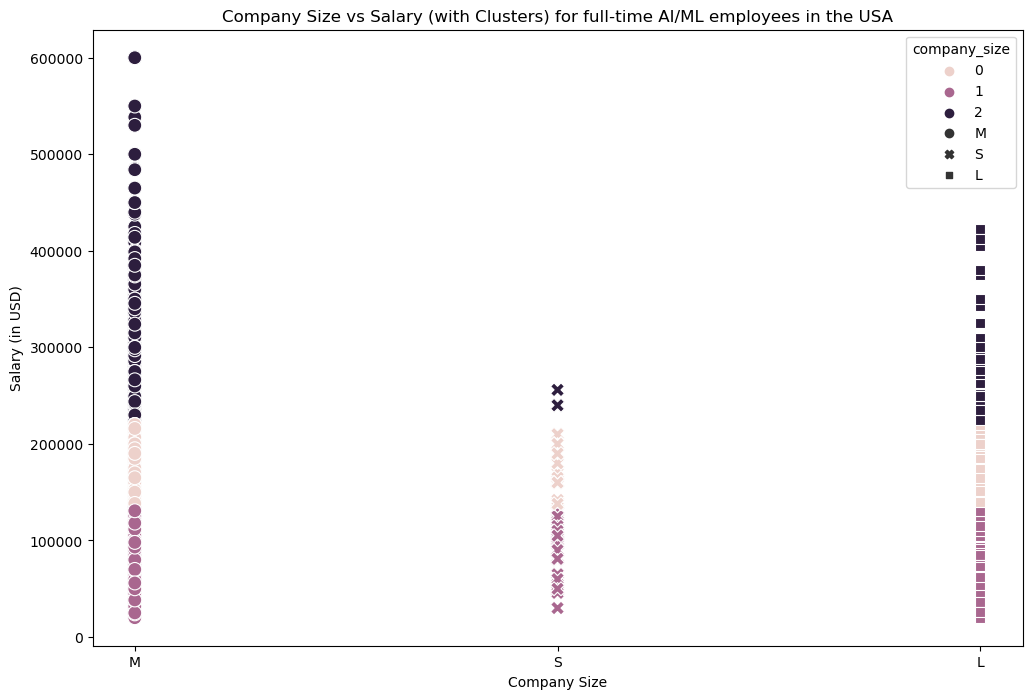

In [19]:
plt.figure(figsize=(12,8))

# Plot salary vs company size with different symbols for each company size
ax = sns.scatterplot(x='company_size', 
                     y='salary_in_usd', 
                     hue=kmeans.labels_,  # Colors representing clusters
                     style='company_size',  # Different markers for company size
                     s=100,  # Marker size
                     data=df_encoded)

# Customize the plot
ax.grid(False)
plt.xlabel('Company Size') 
plt.ylabel('Salary (in USD)')
plt.title('Company Size vs Salary (with Clusters) for full-time AI/ML employees in the USA')
plt.show()

### Small companies tend to have fewer high-paying salaries, while medium and large companies exhibit a broader range of salaries, including both lower and higher salaries.

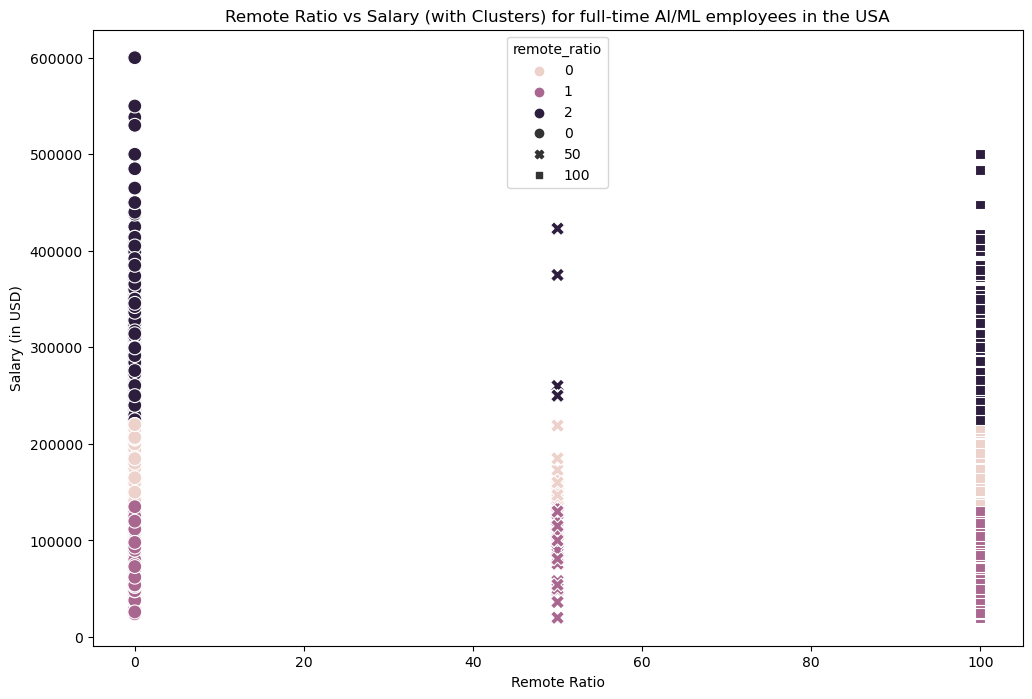

In [20]:
plt.figure(figsize=(12,8))

# Plot salary vs company size with different symbols for each company size
ax = sns.scatterplot(x='remote_ratio', 
                     y='salary_in_usd', 
                     hue=kmeans.labels_,  # Colors representing clusters
                     style='remote_ratio',  # Different markers for company size
                     s=100,  # Marker size
                     data=df_encoded)

# Customize the plot
ax.grid(False)
plt.xlabel('Remote Ratio') 
plt.ylabel('Salary (in USD)')
plt.title('Remote Ratio vs Salary (with Clusters) for full-time AI/ML employees in the USA')
plt.show()

### There are very few hybrid workers in the dataset, and most of them do not have high salaries. However, it's challenging to make a clear comparison due to the extremely small number of hybrid workers in the data.

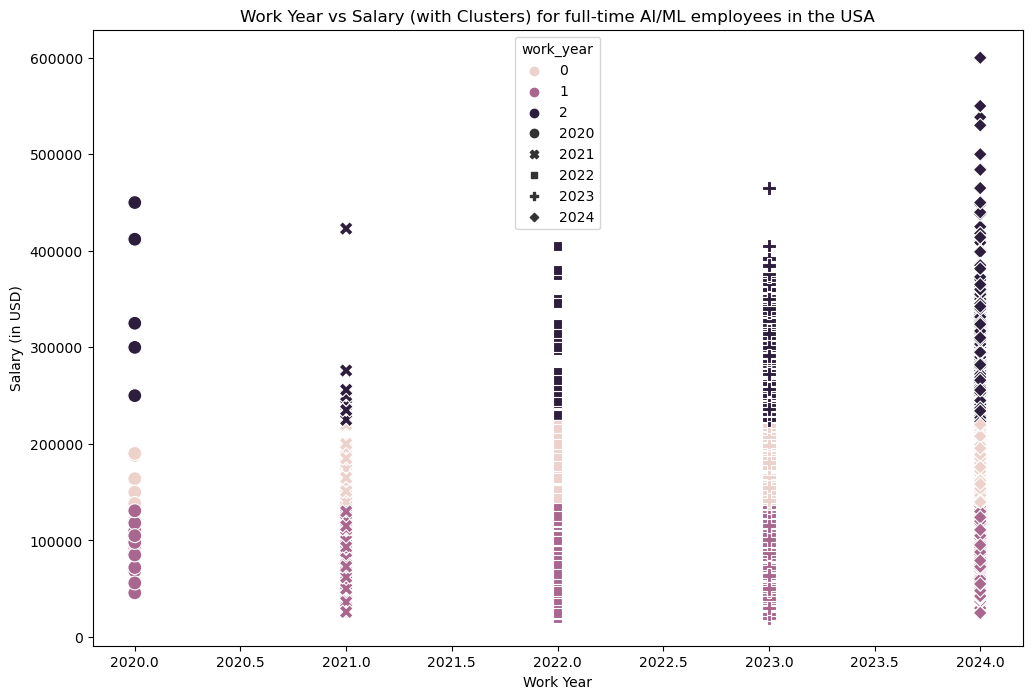

In [21]:
plt.figure(figsize=(12,8))

# Plot salary vs experience level with different symbols for each experience level
ax = sns.scatterplot(x='work_year', 
                     y='salary_in_usd', 
                     hue=kmeans.labels_,  # Colors representing clusters
                     style='work_year',  # Different markers for experience levels
                     s=100,  # Marker size
                     data=df_encoded)

# Customize the plot
ax.grid(False)
plt.xlabel('Work Year') 
plt.ylabel('Salary (in USD)')
plt.title('Work Year vs Salary (with Clusters) for full-time AI/ML employees in the USA')
plt.show()

### The majority of the data comes from 2023 and 2024, with a noticeable concentration of high-paid individuals, including extreme values, in these years.

# 6. Descriptive Statistics 

In [22]:
# Check the columns of your DataFrame
print(df_encoded.columns)

Index(['work_year', 'employment_type', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'experience_level_encoded', 'experience_level_EN',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'company_size_L', 'company_size_M', 'company_size_S',
       'experience_level', 'company_size'],
      dtype='object')


In [23]:
# Fit the KMeans model to your data
df_encoded['clusters'] = kmeans.labels_

# Check if the cluster labels are added
print(df_encoded['clusters'].head())

0    2
1    0
2    0
3    1
4    0
Name: clusters, dtype: int32


In [24]:
# Assign descriptive names to the clusters
df_encoded.loc[df_encoded['clusters'] == 2, 'cluster'] = 'Medium Salary'
df_encoded.loc[df_encoded['clusters'] == 1, 'cluster'] = 'High Salary'
df_encoded.loc[df_encoded['clusters'] == 0, 'cluster'] = 'Low Salary'

# Check the new 'cluster' column
print(df_encoded[['clusters', 'cluster']].head())


   clusters        cluster
0         2  Medium Salary
1         0     Low Salary
2         0     Low Salary
3         1    High Salary
4         0     Low Salary


In [25]:
# For numeric variables (like salary_in_usd and remote_ratio), calculate mean and median
numeric_aggregation = df_encoded.groupby('cluster').agg({
    'salary_in_usd': ['mean', 'median'],
    'remote_ratio': ['mean', 'median']
})

# For categorical variables (like experience_level and company_size), calculate counts or proportions
experience_level_distribution = df_encoded.groupby('cluster')['experience_level'].value_counts(normalize=True)
company_size_distribution = df_encoded.groupby('cluster')['company_size'].value_counts(normalize=True)

# Display the results
print("Numeric Aggregation:")
print(numeric_aggregation)

print("\nExperience Level Distribution by Cluster:")
print(experience_level_distribution)

print("\nCompany Size Distribution by Cluster:")
print(company_size_distribution)


Numeric Aggregation:
               salary_in_usd           remote_ratio       
                        mean    median         mean median
cluster                                                   
High Salary     99138.187500  101000.0    34.201389    0.0
Low Salary     173486.226178  170977.5    35.291756    0.0
Medium Salary  271230.579580  255000.0    27.064565    0.0

Experience Level Distribution by Cluster:
cluster        experience_level
High Salary    SE                  0.473558
               MI                  0.344017
               EN                  0.166934
               EX                  0.015491
Low Salary     SE                  0.693522
               MI                  0.220557
               EX                  0.046574
               EN                  0.039347
Medium Salary  SE                  0.754505
               MI                  0.135886
               EX                  0.090841
               EN                  0.018769
Name: proportion, dtyp

### The aggregations show that the high-salary cluster has the lowest mean remote work ratio. However, for the categorical variables, making sense of the counts is challenging because there are different numbers of people in each category. For example, senior-level workers and medium-sized companies dominate their respective categories, making it difficult to compare their counts across different salary clusters. 

### Therefore, to better compare the impact of experience level and company size on salary, we will calculate the proportion of employees in each experience level with respect to salary, considering the distribution of employees in each category.

In [26]:
# Calculate the proportion of employees in each experience level with respect to salary
salary_by_experience = df_encoded.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'count'])

# Print the results
print(salary_by_experience)


                           mean    median  count
experience_level                                
EN                104297.446675   92700.0    797
EX                203819.575071  200000.0    353
MI                136825.748801  129500.0   2293
SE                169823.473645  160000.0   5369


#### Here, we observe a clear distinction in salaries based on experience level. Executive-level employees earn the highest salaries, followed by senior-level professionals. Mid-level employees earn less, with entry-level positions having the lowest salaries.

In [27]:
# Calculate the proportion of employees in each company size with respect to salary
salary_by_company_size = df_encoded.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count'])

# Print the results
print(salary_by_company_size)

                       mean    median  count
company_size                                
L             155590.100000  144000.0    380
M             156970.958085  148008.5   8374
S             120655.275862  112500.0     58


#### Although the details across different clusters are not visible, we can observe that medium and large-sized companies tend to have higher average salaries. However, the difference is not significant. It's important to note that medium-sized companies are overrepresented, making the comparison less balanced.

In [28]:
# Calculate the proportion of employees in each company size with respect to salary
salary_by_remote_ratio = df_encoded.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'median', 'count'])

# Print the results
print(salary_by_remote_ratio)

                       mean    median  count
remote_ratio                                
0             158651.414136  148350.0   5829
50            134145.808511  115000.0     47
100           153103.917234  147000.0   2936


#### Given that hybrid workers make up only 0.5% of the dataset, it is more meaningful to compare the salaries of remote and on-site workers. The data shows no noticeable difference in the mean and median salaries between these two groups.

# 6. How these results can be useful & Future analysis

### These results provide insights for future steps in an analytics pipeline, particularly in salary benchmarking and compensation strategy. The differences in salaries based on experience level and company size can guide more competitive salary offers. Understanding that executive and senior-level roles and larger companies tend to offer higher salaries can also refine recruitment efforts and forecast salary growth.

### In this analysis, job titles were not considered, which is an important factor for future analysis. However, the large variety of job titles presents a challenge for direct comparisons and may require further grouping or categorization. In future analyses, we can categorize job titles into broader groups to enable more meaningful comparisons. 

### It is important to note that this analysis focused on full-time employment in the USA. With more data from other countries, it would be useful to examine countries with similar economic levels. Looking at different countries with comparable salaries, as seen in the geospatial analysis, could provide deeper insights.

In [29]:
#Export the new dataframe with the country columns
df_cluster.to_csv('/Users/buketoztekin/Documents/df_cluster.csv', index=False)
df_encoded.to_csv('/Users/buketoztekin/Documents/df_encoded.csv', index=False)